In [51]:
import json

In [52]:
with open('data_small.json') as f:
    json_obj = json.load(f)

In [53]:
import pandas as pd
df = pd.DataFrame(json_obj['data'])

In [54]:
def sports_column(x):
    if x in ['해외축구', '농구/배구', '야구', '스포츠일반', '축구', '해외야구']:
        return '스포츠'
    else:
        return x
df['category'] = df['category'].apply(sports_column)
mask = df['category'].isin(['스포츠', '사회','경제','세계','정치','IT/과학'])
df = df[mask]

In [55]:
df.drop(['img_url', 'url', 'img'], axis=1, inplace=True)

In [56]:
df.head()

,id,category,text
0,2021022805573,경제,"클럽하우스에 '용진이형' 떴다, 정용진 ""야구단 이름은…""[SEP]프로야구 연습 경..."
1,2021022631231,IT/과학,"넥슨 '카러플', 블랙핑크 지수와 만났다…지수 만든 캐릭터·아이템 3월 출시[SEP..."
2,2021012107501,IT/과학,"""조선왕조실록 지라시네""…선 넘은 '철인왕후' 행정지도[SEP]조선왕조실록, 종묘제..."
3,2021022405656,세계,"유럽 출판사, 램지어 재일교포 논문 조사 착수…""심각한 사안""[SEP]논문에 주의표..."
4,2021020101796,경제,"자영업 손실보상 '형식·기준'엔 공감대…'범위·명칭'만 남아[SEP]당정, 4월 이..."


In [57]:
df['title'] = df['text']
df['content'] = df['text']

df['title'] = df['title'].apply(lambda x: str(x.split('[SEP]')[0]))
df['content'] = df['content'].apply(lambda x: str(x.split('[SEP]')[1]))

df['content_len'] = df['content'].apply(lambda x: len(x.replace('\n','')))
df['paragraph_num'] = df['content'].apply(lambda x: len(x.split('\n\n')))
df['title_len'] = df['title'].apply(lambda x: len(x))
df['date'] = df['id'].apply(lambda x: x[4:8])
df['avg_paragraph'] = df['content'].apply(lambda x: int(len(x) / len(x.split('\n\n'))))

In [58]:
df.drop(['id', 'text'], axis=1, inplace=True)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

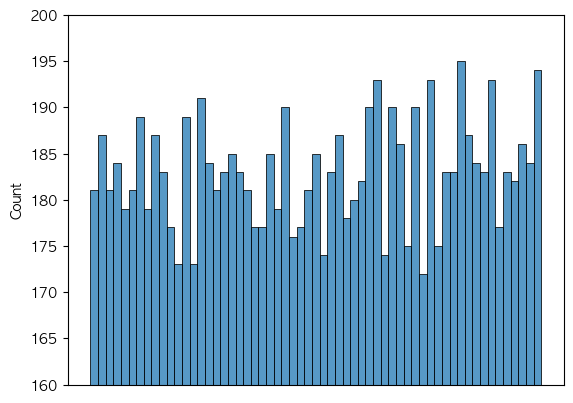

Average number : 182.95
Std : 5.79


In [60]:
# 날짜별로 몇개인지
plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
ax = sns.histplot(df['date'])
plt.ylim(160, 200)
plt.show()

df2 = df.groupby(['date']).count()
print(f"Average number : {round(df2['category'].mean(), 2)}") 
print(f"Std : {round(df2['category'].std(), 2)}")

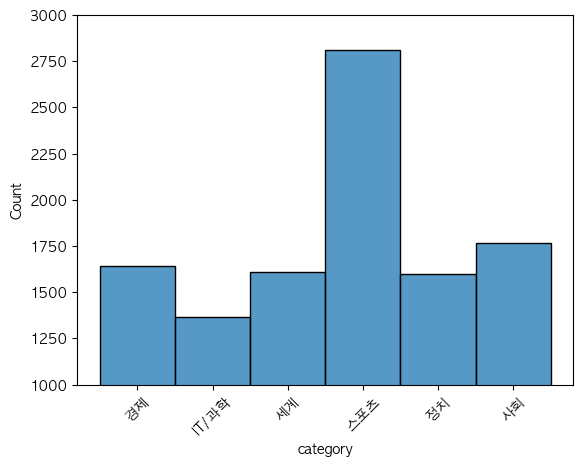

Average number : 1799.0
Std : 513.46


In [101]:
# 날짜별로 몇개인지
# plt.tick_params(axis='x', bottom=False, top=False, labelbottom=False)
plt.rcParams['font.family'] = 'AppleGothic'
_ = sns.histplot(df['category'])
# plt.ylim(160, 200)
plt.xticks(rotation=45)
plt.ylim(1000, 3000)
plt.show()

df2 = df.groupby(['category']).count()
print(f"Average number : {round(df2['title'].mean(), 2)}") 
print(f"Std : {round(df2['title'].std(), 2)}")

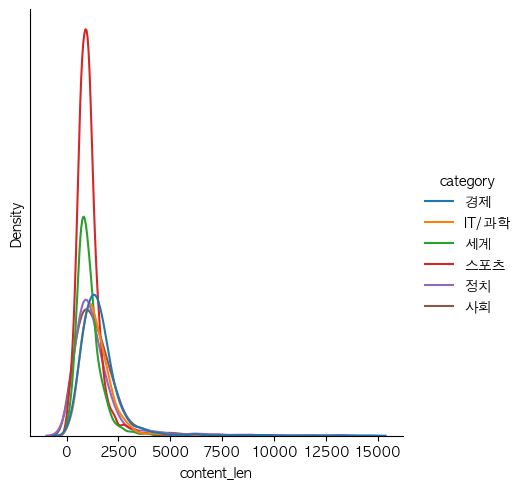

Average length of content : 1310.67
Std : 1007.27


In [103]:
ax = sns.displot(df, x='content_len', kind='kde', hue='category')
ax.set(yticks=[])
plt.show()

print(f"Average length of content : {round(df['content_len'].mean(), 2)}")
print(f"Std : {round(df['content_len'].std(), 2)}")

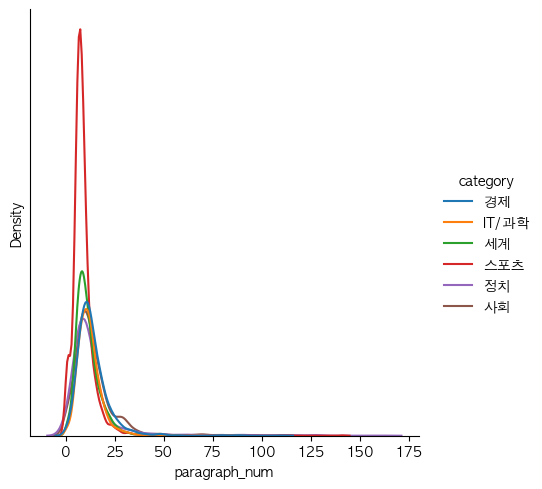

Average number of paragraph : 11.88
Std : 9.56


In [104]:
ax = sns.displot(df, x='paragraph_num', kind='kde', hue='category')
ax.set(yticks=[])
plt.show()
print(f"Average number of paragraph : {round(df['paragraph_num'].mean(), 2)}")
print(f"Std : {round(df['paragraph_num'].std(), 2)}")

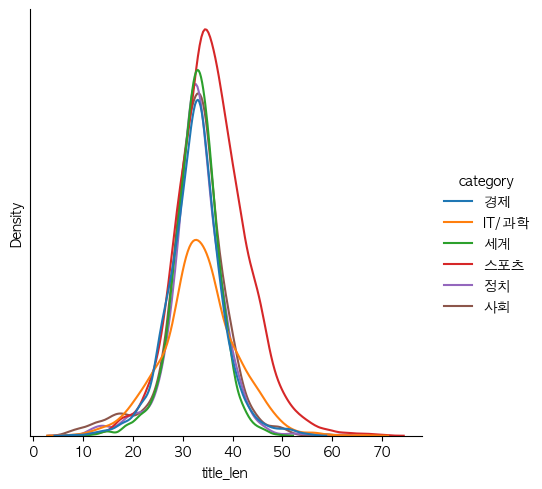

Average length of title : 33.53
Std : 6.38


In [105]:
ax = sns.displot(df, x='title_len', kind='kde', hue='category')
ax.set(yticks=[])
plt.show()
print(f"Average length of title : {round(df['title_len'].mean(), 2)}")
print(f"Std : {round(df['title_len'].std(), 2)}")

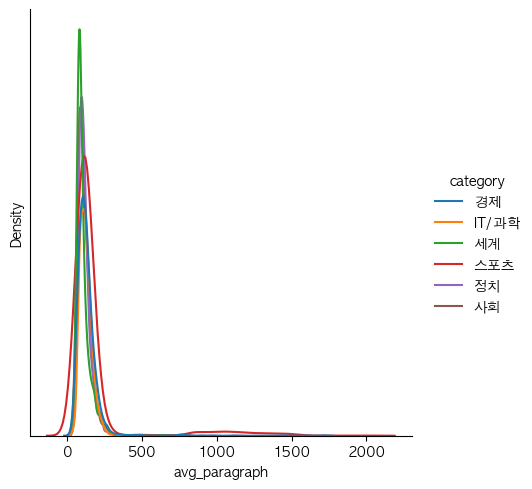

Average length of paragraph : 131.22
Std : 135.63


In [106]:
ax = sns.displot(df, x='avg_paragraph', kind='kde', hue='category')
ax.set(yticks=[])
plt.show()
print(f"Average length of paragraph : {round(df['avg_paragraph'].mean(), 2)}")
print(f"Std : {round(df['avg_paragraph'].std(), 2)}")